In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
btc = btc_ticker.history(period="max")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-12 00:00:00+00:00,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.0,0.0
2024-04-13 00:00:00+00:00,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.0,0.0
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

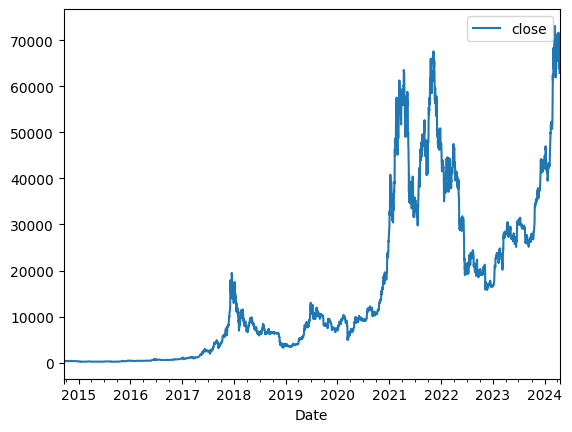

In [8]:
btc.plot.line(y="close", use_index=True)

In [9]:
bitcoin_wiki = pd.read_csv("wikipedia_edits_bitcoin.csv", index_col=0, parse_dates=True)

In [10]:
bitcoin_wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-04-12,0.333333,-0.096713,0.133333
2024-04-13,0.333333,-0.096713,0.133333
2024-04-14,0.333333,-0.096713,0.133333
2024-04-15,0.333333,-0.096713,0.133333


In [14]:
btc = btc.tz_localize(None)
bitcoin_wiki = bitcoin_wiki.tz_localize(None)

In [15]:
btc = btc.merge(bitcoin_wiki, left_index=True, right_index=True)

In [16]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-04-12,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.333333,-0.096713,0.133333
2024-04-13,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.333333,-0.096713,0.133333
2024-04-14,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.333333,-0.096713,0.133333
2024-04-15,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.333333,-0.096713,0.133333


In [17]:
btc["tomorrow"] = btc["close"].shift(-1)

In [18]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-04-12,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.333333,-0.096713,0.133333,63821.472656
2024-04-13,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.333333,-0.096713,0.133333,65738.726562
2024-04-14,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.333333,-0.096713,0.133333,63426.210938
2024-04-15,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.333333,-0.096713,0.133333,62875.835938


In [19]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [20]:
btc["target"].value_counts()

target
1    1855
0    1645
Name: count, dtype: int64

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.metrics import precision_score

In [26]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [27]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5

In [28]:
model1 = RandomForestClassifier(n_estimators=150, min_samples_split=60, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model1.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=60, n_estimators=150, random_state=1)

In [29]:
preds1 = model1.predict(test[predictors])
preds1 = pd.Series(preds1, index=test.index)
precision_score(test["target"], preds1)

0.5142857142857142

In [48]:
model2 = RandomForestClassifier(n_estimators=200, min_samples_split=70, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model2.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=70, n_estimators=200, random_state=1)

In [49]:
preds2 = model2.predict(test[predictors])
preds2 = pd.Series(preds2, index=test.index)
precision_score(test["target"], preds2)

0.5277777777777778

In [124]:
model2 = RandomForestClassifier(n_estimators=200, min_samples_split=45, random_state=1)

train3 = btc.iloc[:-99]
test3 = btc[-99:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model2.fit(train3[predictors], train3["target"])

RandomForestClassifier(min_samples_split=45, n_estimators=200, random_state=1)

In [125]:
preds3 = model2.predict(test3[predictors])
preds3 = pd.Series(preds3, index=test3.index)
precision_score(test3["target"], preds3)

0.7272727272727273